<a href="https://colab.research.google.com/github/xn2333/Color-Science-Computing/blob/master/Seminar_Image_Processing_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction to Image Processing in Python**
An NCSU Libraries Workshop

Speaker: Nian Xiong

This workshop intends to provide some basic image processing techniques based on OpenCV library and some standard data analysis library of python. Knowledge of Python programming is not required for this seminar, but will help.



##Step1: Load the Dependencies



In [0]:
import numpy as np # for linear algebra, Fourier transform, and random number capabilities
import pandas as pd # for data analysis
import cv2 as cv # for computer vision applications
from google.colab.patches import cv2_imshow # for image display
from skimage import io # for image processing applications
from PIL import Image # provides general image handeling and lots of useful basic image operations including 

##Step2: Read Image from Urls


Use it as exercise:

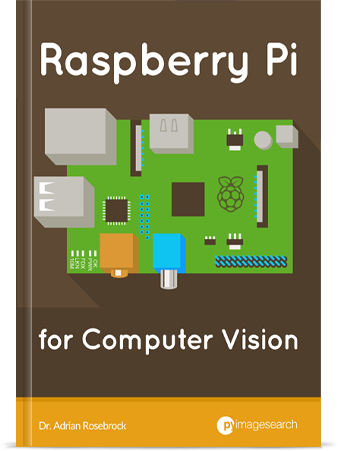

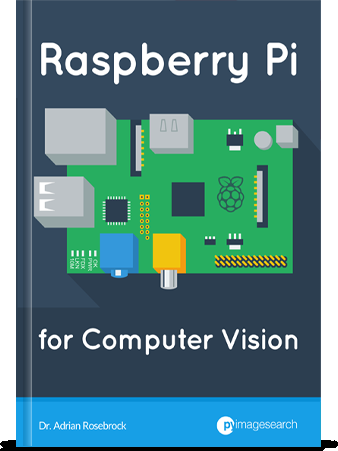

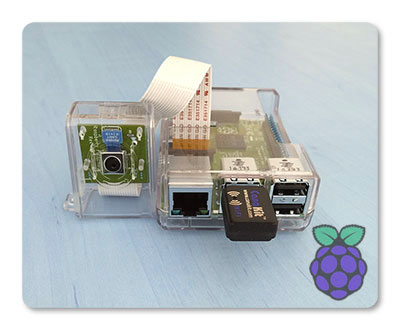

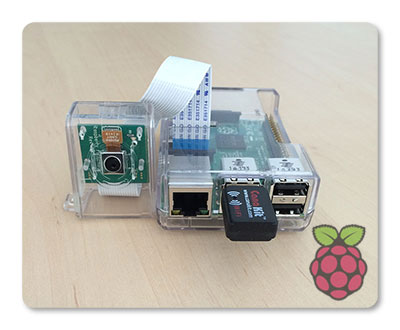

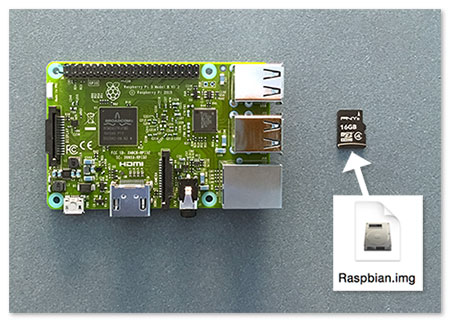

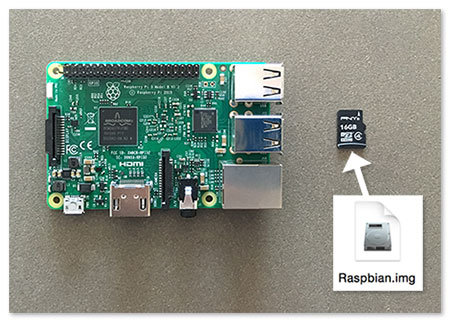

In [0]:
# Create a list to store the strings of the urls of the images
urls = ["https://www.pyimagesearch.com/static/templates/raspberry-pi-for-computer-vision/images/rpi4cv_cover.png",
       "https://www.pyimagesearch.com/static/templates/practical-python-and-opencv/images/case-studies/raspberry_pi.jpg",
       "https://www.pyimagesearch.com/static/templates/practical-python-and-opencv/images/ppao_raspbian.jpg"]
        
# Read and display the image
# loop over the image URLs, you could store several image urls in the list
for url in urls:
  image = io.imread(url) 
  cv2_imshow(image)
  cv2_imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
        

https://d.lib.ncsu.edu/collections

##Step3: Image Contours and Histograms

In [0]:
# Check the image matrix data type (could know the bit depth of the image)
image.dtype
# Check the image dimension
image.shape

(322, 450, 3)

(array([ 2115.,   575.,   632.,   648.,   608.,   654.,   618.,   594.,
          640.,   611.,   674.,   703.,   736.,   818.,   845.,   959.,
          971.,  1048.,  1115.,  1199.,  1256.,  1359.,  1357.,  1438.,
         1523.,  1736.,  1792.,  1943.,  1974.,  2003.,  2036.,  2124.,
         2112.,  2050.,  2206.,  2233.,  2288.,  2452.,  2620.,  2679.,
         2838.,  2734.,  2857.,  2884.,  3206.,  3374.,  3507.,  3590.,
         3871.,  3779.,  4001.,  3993.,  4094.,  4304.,  4372.,  4572.,
         4748.,  5049.,  5468.,  5566.,  6001.,  6026.,  6481.,  6772.,
         6894.,  7168.,  7260.,  7482.,  7624.,  7648.,  7756.,  7745.,
         8215.,  7897.,  8105.,  8012.,  8058.,  7747.,  7899.,  7720.,
         7410.,  7264.,  7179.,  6704.,  6343.,  5784.,  5231.,  4707.,
         4085.,  3616.,  3133.,  2749.,  2353.,  2004.,  1869.,  1548.,
         1320.,   979.,   710.,   720.,   946.,  1253.,   956.,   747.,
          480.,   443.,   382.,   417.,   440.,   686.,  1246., 

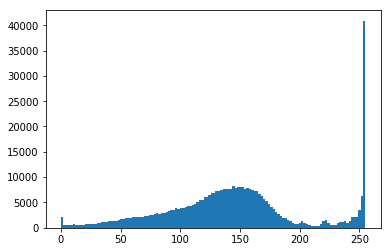

In [0]:
from matplotlib.pylab import * 
hist(image.flatten(),128)

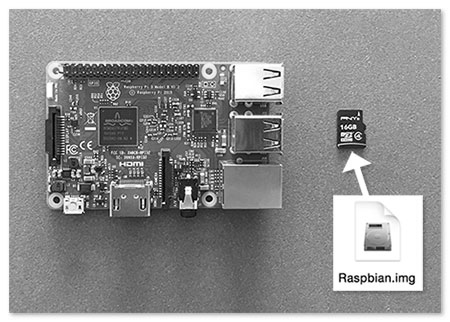

(array([   39.,    71.,    54.,    48.,    34.,    45.,    69.,    62.,
           67.,    87.,    87.,    91.,   112.,   116.,   133.,   180.,
          219.,   181.,   256.,   283.,   315.,   374.,   386.,   426.,
          440.,   485.,   573.,   607.,   685.,   728.,   759.,   740.,
          820.,   792.,   759.,   798.,   787.,   862.,   875.,  1040.,
         1055.,  1100.,  1144.,  1172.,  1301.,  1313.,  1288.,  1342.,
         1431.,  1431.,  1549.,  1725.,  1722.,  1797.,  1754.,  1715.,
         1766.,  1644.,  1654.,  1692.,  1700.,  2015.,  2019.,  2161.,
         2267.,  2263.,  2449.,  2591.,  2483.,  2637.,  2588.,  2672.,
         2550.,  2720.,  2664.,  2754.,  2774.,  2790.,  2761.,  2900.,
         2782.,  2579.,  2586.,  2328.,  2193.,  1879.,  1652.,  1465.,
         1223.,  1072.,   823.,   705.,   605.,   699.,   564.,   478.,
          347.,   256.,   199.,   183.,   290.,   485.,   349.,   192.,
          170.,   144.,   145.,   174.,   143.,   216.,   451., 

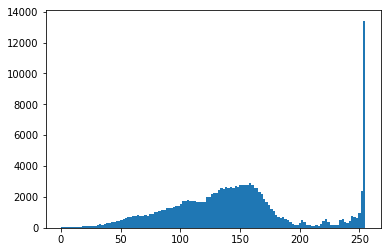

In [0]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)
hist(gray_image.flatten(),128)

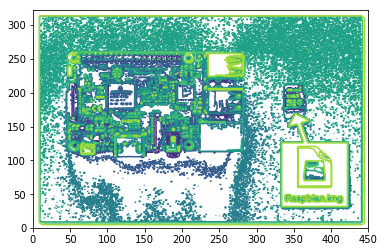

In [0]:
contour(gray_image, origin = "image")

##Step4: Grayscale Transform and Histogram Equalization
###Description: In image2, ....inverse 

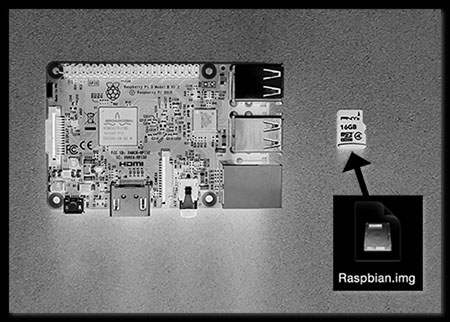

In [0]:
im2 = 255 - gray_image
cv2_imshow(im2)

###Image 3 is to add a constant noise....(formula)....application....(purpose)...

Tranform: give a formula, they can implement...

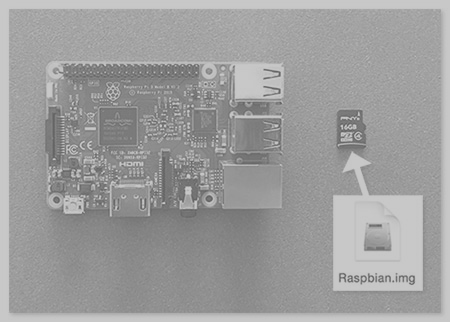

In [0]:
im3 = (100.0/255)*gray_image + 100
cv2_imshow(im3)

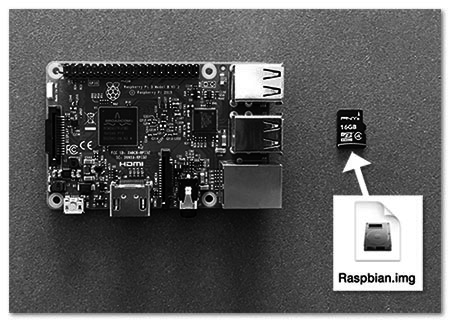

In [0]:
im4 = 255.0*(gray_image/255.0)**2
cv2_imshow(im4)

### make better contrast ratio, histogram for each image...
### provide an overview 
### find a new image to analyze

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


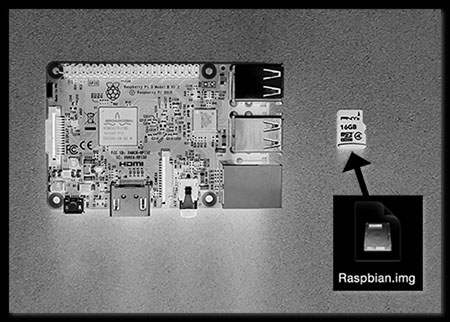

In [0]:
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = histogram(im.flatten(), nbr_bins, normed = True)
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = 255*cdf/cdf[-1]  #normalize
  
  # use linear interpolation of cdf to find new pixel values
  #im2 = interp(im.flatten(), bins[-1], cdf)
  return im2.reshape(im.shape), cdf

im5, cdf = histeq(im4)
cv2_imshow(im5)

##Step5: Fourier Transform of Gray Images


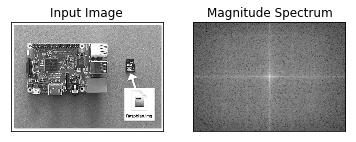

In [0]:
f = np.fft.fft2(gray_image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(gray_image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Make the images horizontal ...
FFT....
30 min talk, 30 min questions, 30 min buffer time
Add a description of what will be covered, 5 to 8 sentences. Send to Walt.



## Step6: Edge detection by Highpass Filtering

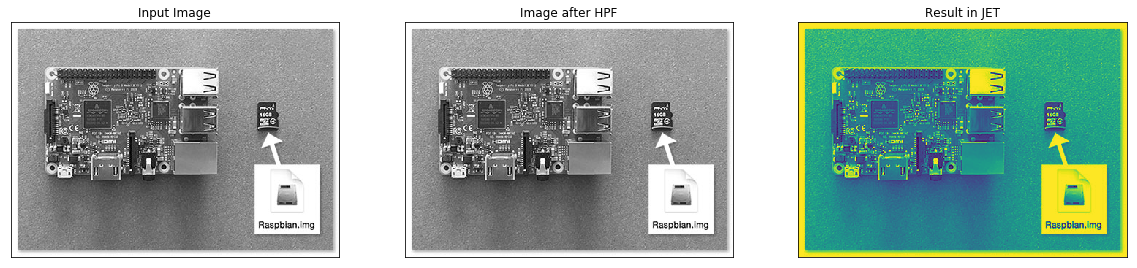

In [0]:
rows, cols = gray_image.shape
crow,ccol = rows/2 , cols/2
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(gray_image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()